# Доверительные интервалы для оценки среднего

In [11]:
from sklearn import cross_validation, datasets, linear_model, metrics
import pandas as pnd
import numpy as np

In [12]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Генерация данных

In [14]:
blobs = datasets.make_blobs(300, centers = 2, cluster_std = 6, random_state=1)

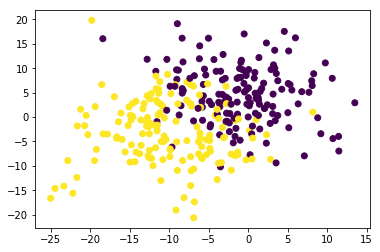

In [30]:
# визуализируем данные
scatter(blobs[0][:,0], blobs[0][:,1], c = blobs[1])

## Сравнение линейных моделей

### Точечная оценка

In [31]:
# делим выборку test_size = 15
X_train,X_test,y_train,y_test = cross_validation.train_test_split(blobs[0],blobs[1],test_size = 0.15)


In [34]:
# обучаем RidgeClassifier и смотрим значение ROC кривой
from sklearn.linear_model import RidgeClassifier
rc = RidgeClassifier()
rc.fit(X_train,y_train)
from sklearn.metrics import roc_curve


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)

In [ ]:
# обучаем SGDClassifier и смотрим значение ROC кривой


### Оценка среднего

In [ ]:
# используем cross_validation.cross_val_score, cv = 20 для SGD и Ridge

### Точечная оценка среднего

In [ ]:
# печатаем среднее и дисперсию

### Интервальная оценка среднего 

In [ ]:
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic

#### z-интервал

Допустим, нам откуда-то известно, что дисперсия auc_scores $\sigma^2=0.25$. Построим доверительные интервалы для средних вида $$\bar{X}_n \pm z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}$$

In [ ]:
print("sgd model mean auc 95%% confidence interval", _zconfint_generic(sgd_mean, 
                                                                  sqrt(0.25/len(sgd_auc_scores)), 
                                                                  0.05, 'two-sided'))

print("ridge model mean auc 95%% confidence interval", _zconfint_generic(ridge_mean, 
                                                                    sqrt(0.25/len(sgd_auc_scores)), 
                                                                    0.05, 'two-sided'))

#### t-интервал

Вместо гипотетической теоретической дисперсии $\sigma^2$, которую мы на самом деле в данном случае не знаем, используем выборочные дисперсии, и построим доверительные интервалы вида $$\bar{X}_n \pm t_{1-\frac{\alpha}{2}} \frac{S}{\sqrt{n}}$$

In [ ]:
type(sgd_auc_scores)

In [ ]:
sgd_mean_std = sgd_auc_scores.std(ddof=1)/sqrt(len(sgd_auc_scores))
ridge_mean_std = ridge_auc_scores.std(ddof=1)/sqrt(len(ridge_auc_scores))

In [ ]:
print("sgd model mean auc 95%% confidence interval", _tconfint_generic(sgd_mean, sgd_mean_std,
                                                                       len(sgd_auc_scores) - 1,
                                                                       0.05, 'two-sided'))

print("ridge model mean auc 95%% confidence interval", _tconfint_generic(ridge_mean, ridge_mean_std,
                                                                         len(sgd_auc_scores) - 1,
                                                                         0.05, 'two-sided'))